In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [21]:
dados = pd.read_csv('./MICRODADOS_ENEM_2022.csv', sep=';', encoding='ISO-8859-1')
dados.dropna(inplace=True)
dados.reset_index(drop=True, inplace=True)

In [22]:
target = dados.NU_NOTA_MT
nota_humanas = dados.NU_NOTA_CH
sexo = dados.TP_SEXO
cor_raca = dados.TP_COR_RACA
renda = dados.Q006
treineiro = dados.IN_TREINEIRO

In [23]:
cor_raca = pd.Categorical(cor_raca)
renda = pd.Categorical(renda)
treineiro = pd.Categorical(treineiro)

cor_raca = cor_raca.rename_categories(['Não declarado', 'Branca', 'Preta', 'Parda', 'Amarela', 'Indígena'])
renda = renda.rename_categories([
    'Nenhuma Renda', 
    'Até R$ 1.212,00', 
    'De R$ 1.212,01 até R$ 1.818,00',
    'De R$ 1.818,01 até R$ 2.424,00',
    'De R$ 2.424,01 até R$ 3.030,00',
    'De R$ 3.030,01 até R$ 3.636,00',
    'De R$ 3.636,01 até R$ 4.848,00',
    'De R$ 4.848,01 até R$ 6.060,00',
    'De R$ 6.060,01 até R$ 7.272,00',
    'De R$ 7.272,01 até R$ 8.484,00',
    'De R$ 8.484,01 até R$ 9.696,00',
    'De R$ 9.696,01 até R$ 10.908,00',
    'De R$ 10.908,01 até R$ 12.120,00',
    'De R$ 12.120,01 até R$ 14.544,00',
    'De R$ 14.544,01 até R$ 18.180,00',
    'De R$ 18.180,01 até R$ 24.240,00',
    'Acima de R$ 24.240,00'
])
treineiro = treineiro.rename_categories(['Não Treineiro', 'Treineiro'])

dados['TP_COR_RACA'] = cor_raca
dados['Q006'] = renda
dados['IN_TREINEIRO'] = treineiro

### Comparando a variável target (Nota de matemática) com a feature (Sexo)

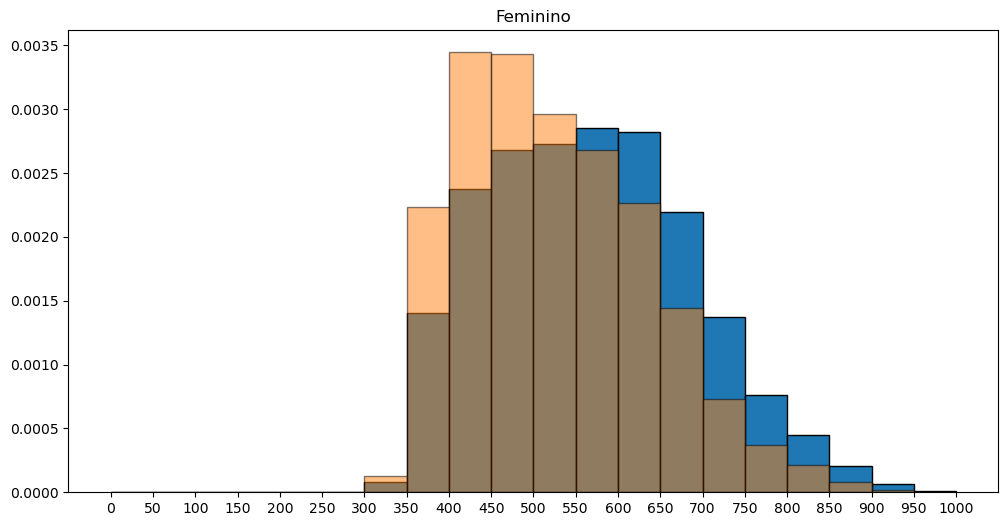

In [24]:
nota_mat_masc = dados.loc[dados.TP_SEXO == 'M', 'NU_NOTA_MT']
nota_mat_fem = dados.loc[dados.TP_SEXO == 'F', 'NU_NOTA_MT']

amp = np.linspace(0, 1000, 21)
plt.figure(figsize=(12, 6))
# plt.subplot(211)
plt.hist(nota_mat_masc, bins=amp, edgecolor='black', density=True)
plt.title('Masculino')
plt.xticks(amp)
# plt.subplot(212)
plt.hist(nota_mat_fem, bins=amp, edgecolor='black', density=True, alpha=0.5)
plt.title('Feminino')
plt.xticks(amp)
plt.show()

In [25]:
dados.groupby('TP_SEXO').describe()['NU_NOTA_MT'].T.apply(lambda x: x.round(2))

TP_SEXO,F,M
count,1436668.00,908155.00
mean,526.70,567.78
std,109.86,120.79
min,0.00,0.00
25%,438.70,471.50
50%,512.20,563.00
75%,602.30,651.10
max,985.70,985.70


### Comparando a variável target (Nota de matemática) com a feature (Nota de humanas)

In [26]:
target.corr(nota_humanas)

0.6214242815018299

### Comparando a variável target (Nota de matemática) com a feature (Cor/Raça)

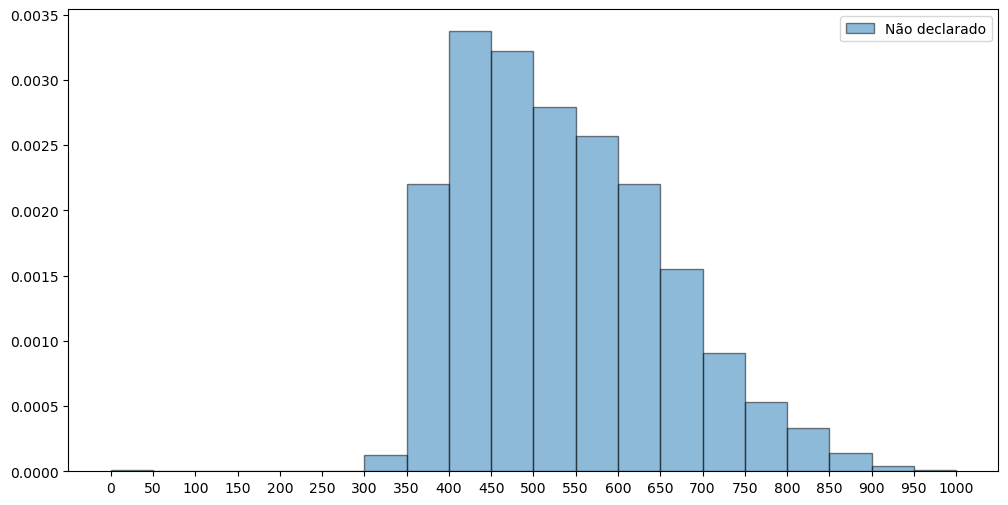

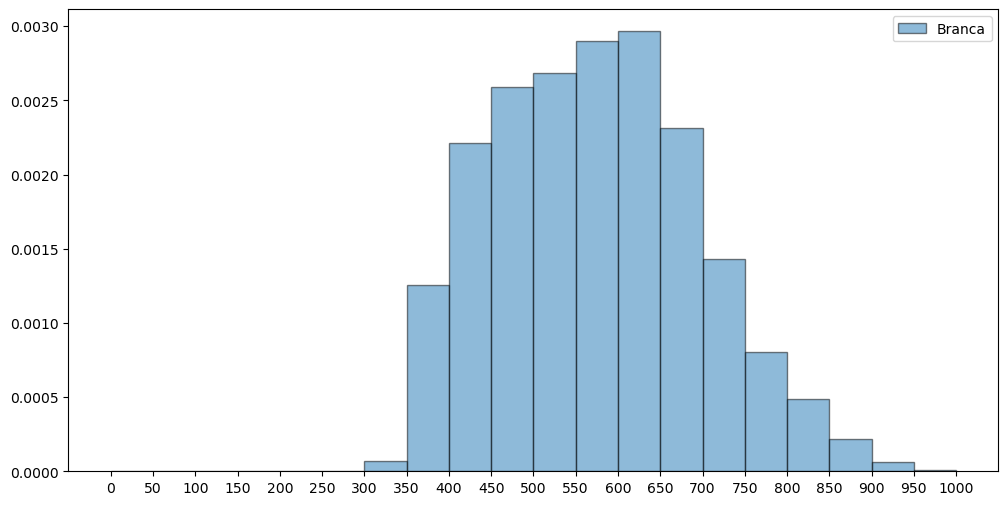

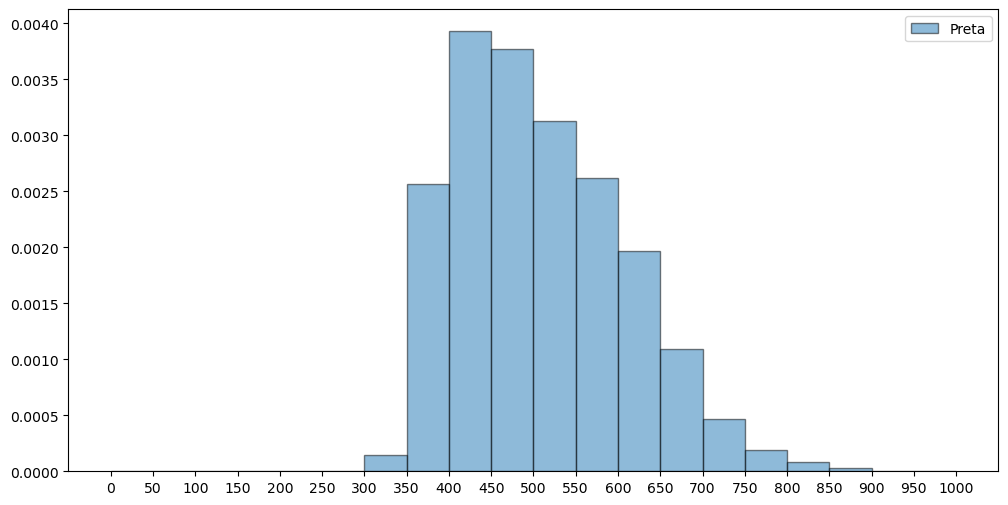

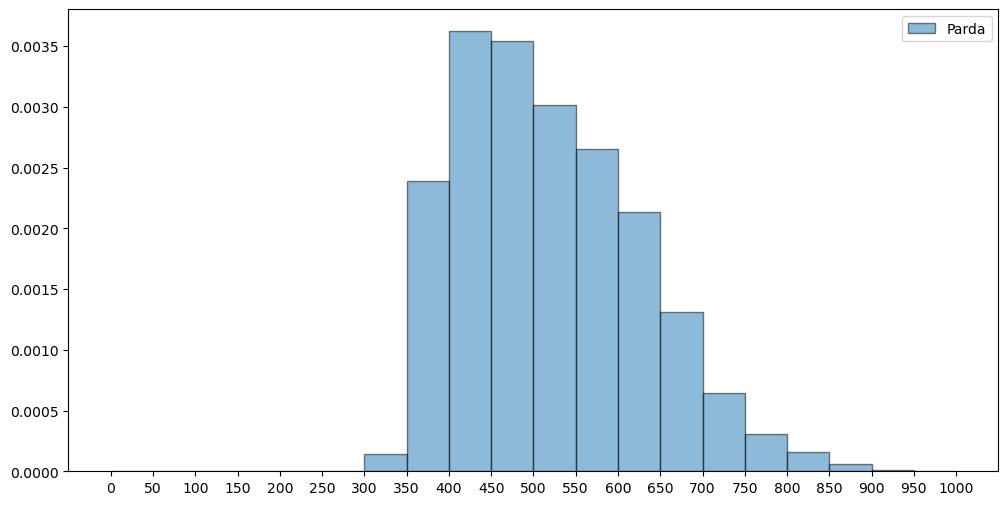

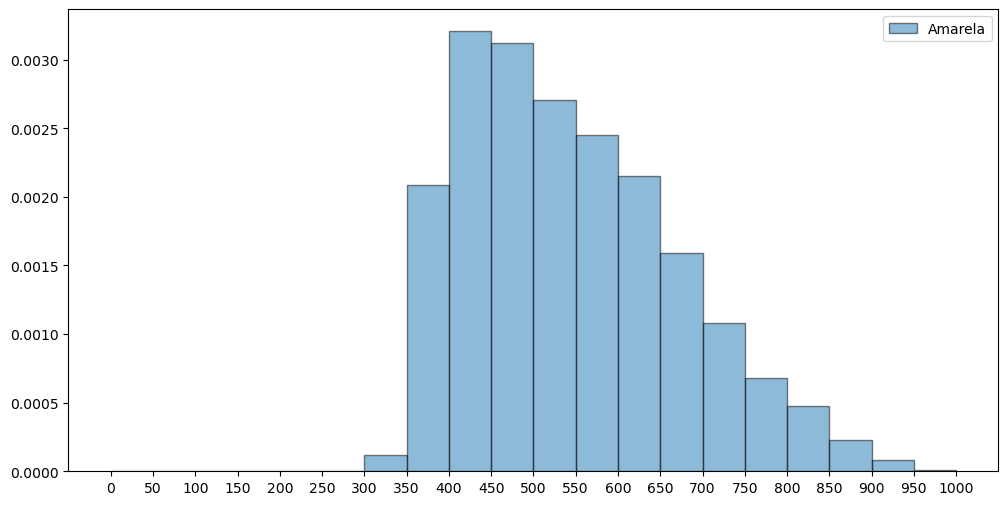

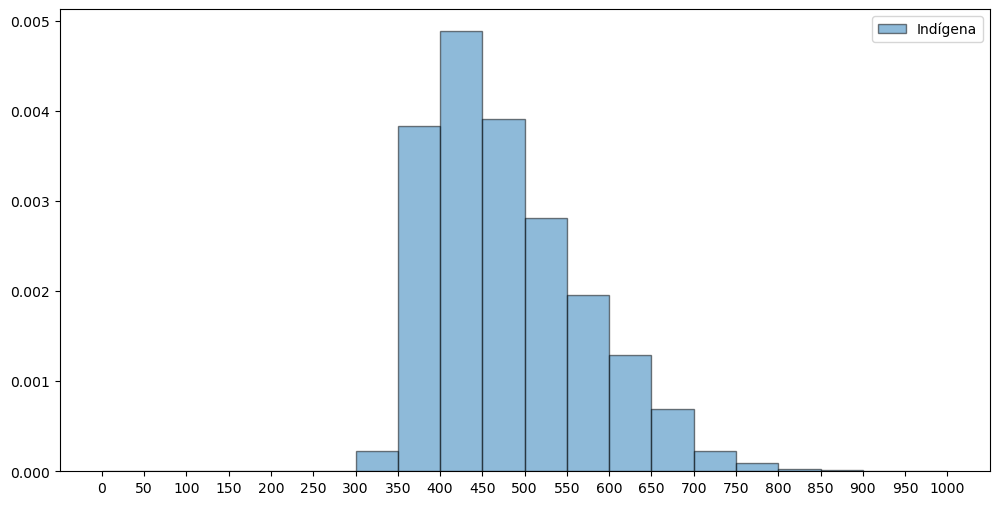

In [27]:
amp = np.linspace(0, 1000, 21)
for category in cor_raca.categories:
    notas = dados.loc[dados.TP_COR_RACA == category, 'NU_NOTA_MT']
    plt.figure(figsize=(12, 6))
    plt.hist(notas, bins=amp, alpha=0.5, label=category, density=True, edgecolor='black')
    plt.legend()
    plt.xticks(amp)
    plt.show()


In [28]:
dados.groupby('TP_COR_RACA').describe()['NU_NOTA_MT'].T.apply(lambda x: x.round(2))

TP_COR_RACA,Não declarado,Branca,Preta,Parda,Amarela,Indígena
count,40871.00,1026418.00,255863.00,966698.00,43782.00,11191.00
mean,535.09,573.55,508.51,519.71,545.35,480.20
std,118.41,120.03,99.37,106.78,125.77,91.12
min,0.00,0.00,0.00,0.00,0.00,0.00
25%,439.75,478.50,429.70,434.60,443.50,409.50
50%,518.30,571.20,494.10,504.60,525.90,461.70
75%,614.55,656.00,576.70,592.70,628.58,535.50
max,983.90,985.70,981.30,985.70,985.70,936.30


### Comparando a variável target (Nota de matemática) com a feature (Treineiro)

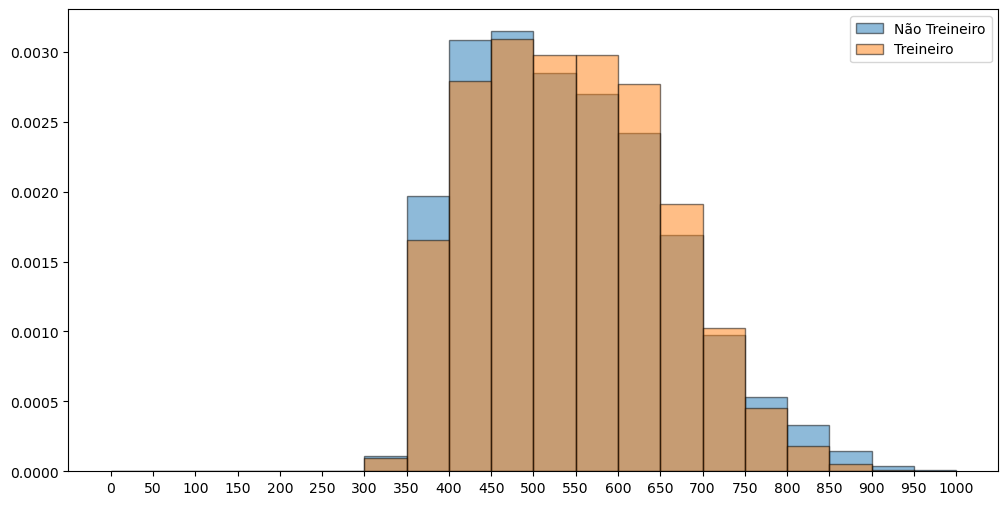

In [31]:
amp = np.linspace(0, 1000, 21)
plt.figure(figsize=(12, 6))
for category in treineiro.categories:
    notas = dados.loc[dados.IN_TREINEIRO == category, 'NU_NOTA_MT']
    plt.hist(notas, bins=amp, alpha=0.5, label=category, density=True, edgecolor='black')
    plt.legend()
    plt.xticks(amp)

plt.show()

In [32]:
dados.groupby('IN_TREINEIRO').describe()['NU_NOTA_MT'].T.apply(lambda x: x.round(2))

IN_TREINEIRO,Não Treineiro,Treineiro
count,1927753.00,417070.00
mean,542.09,545.03
std,117.41,108.98
min,0.00,0.00
25%,447.40,457.20
50%,529.00,539.30
75%,622.10,623.80
max,985.70,985.70


### Comparando a variável target (Nota de matemática) com a feature (Renda)

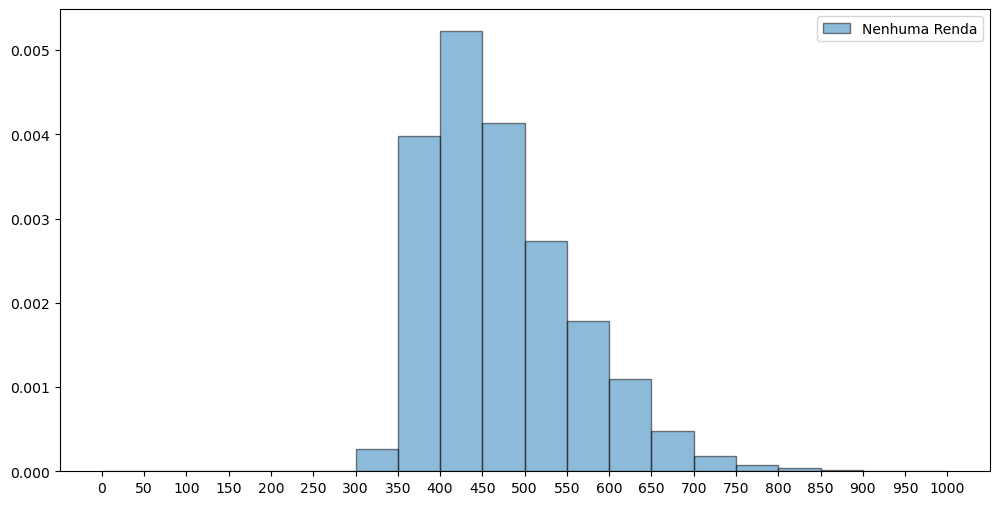

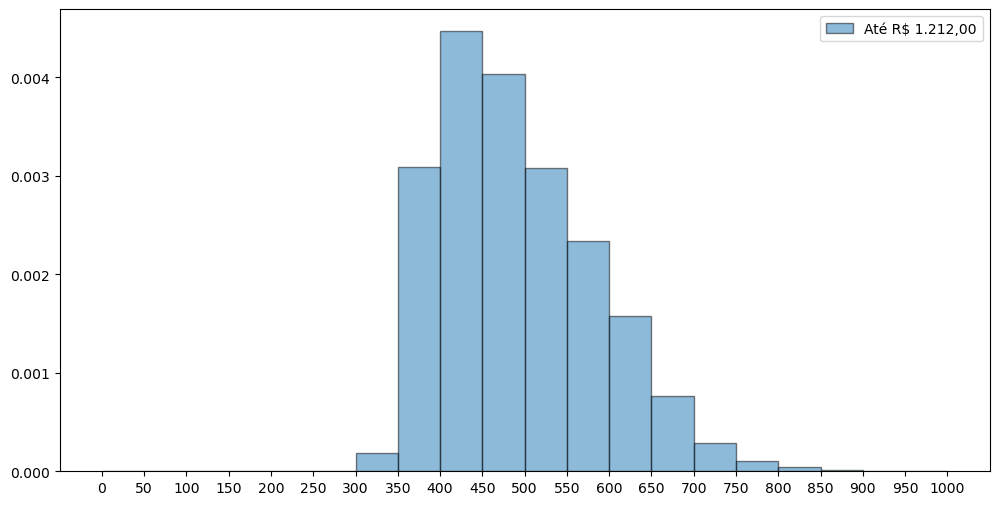

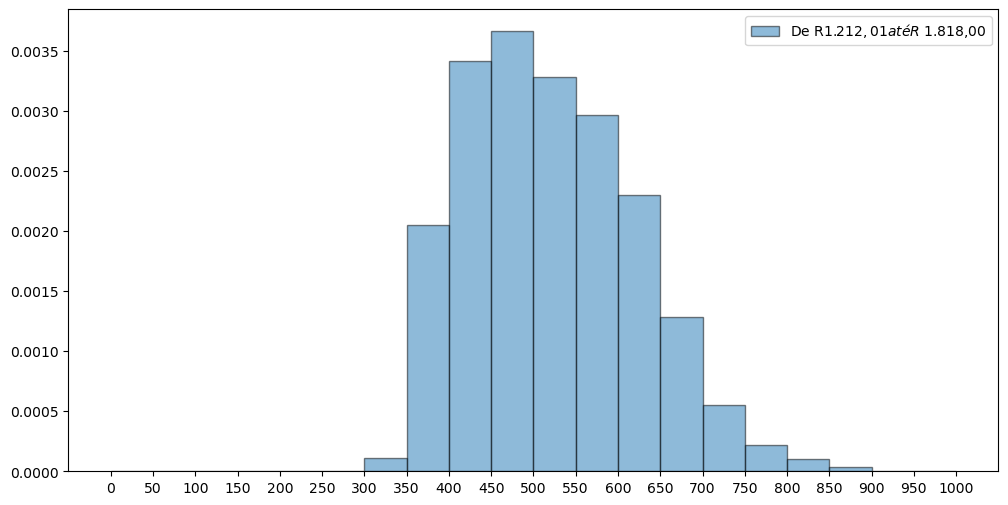

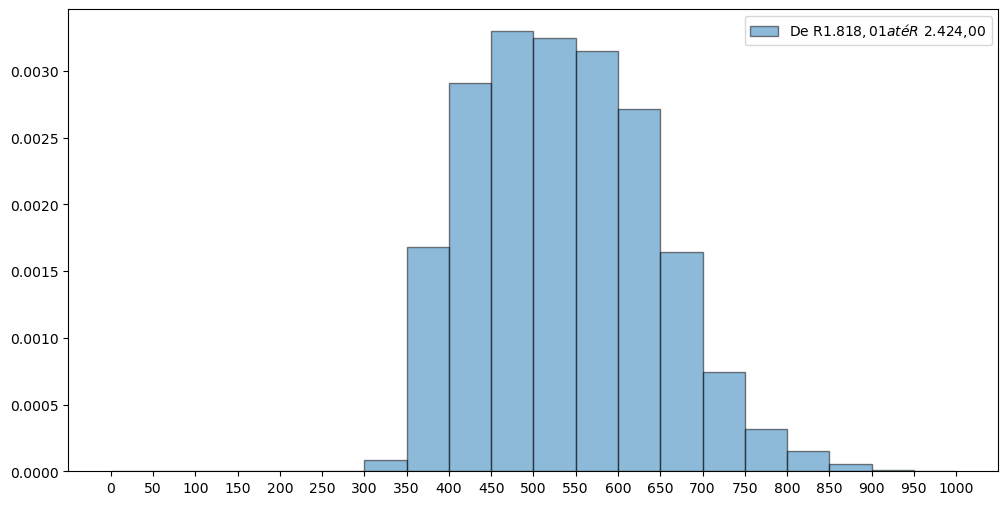

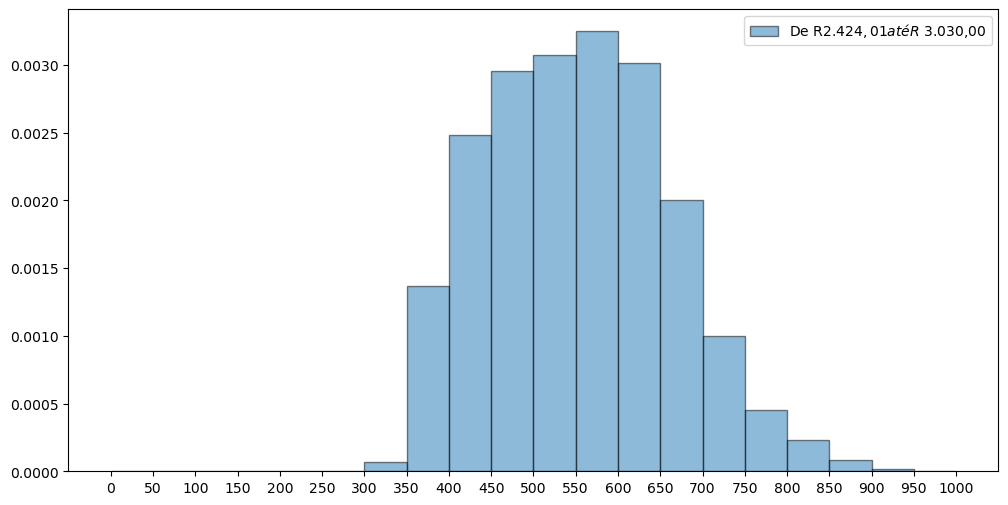

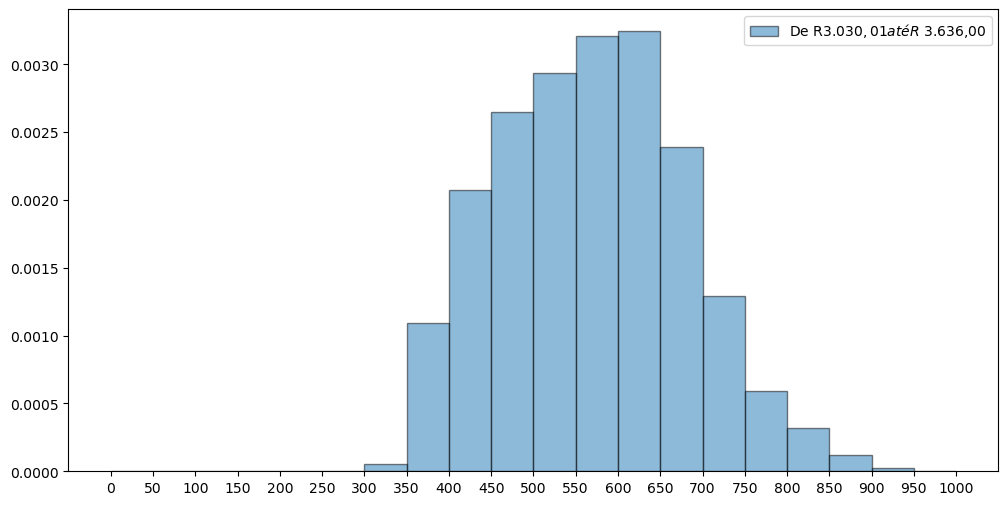

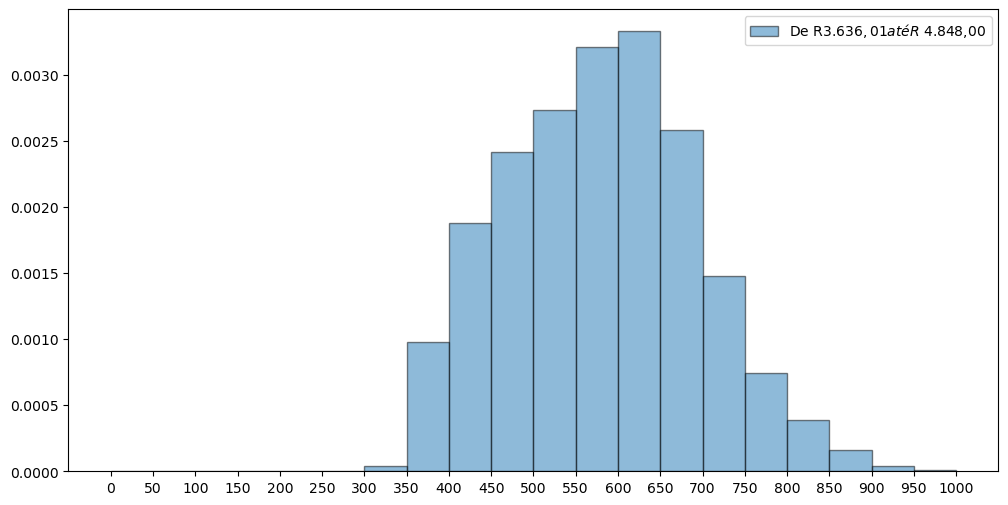

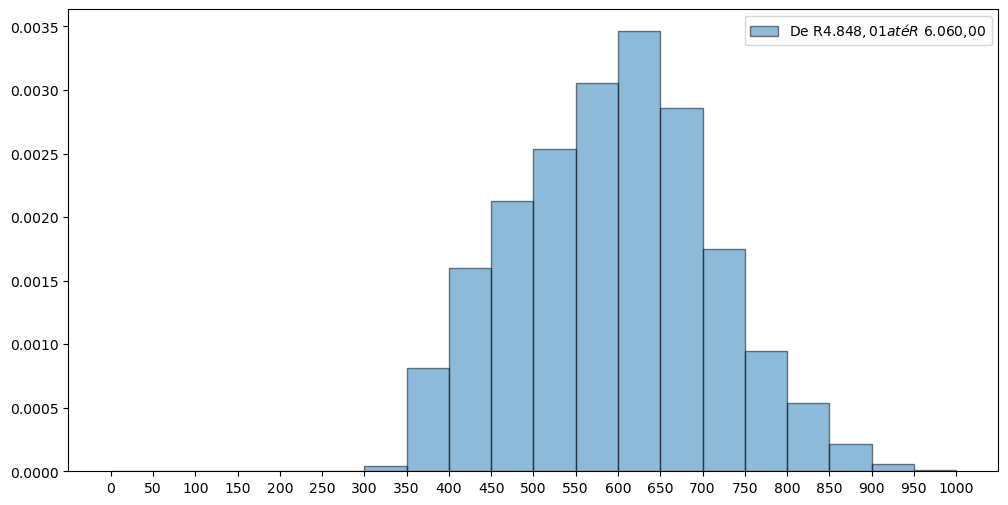

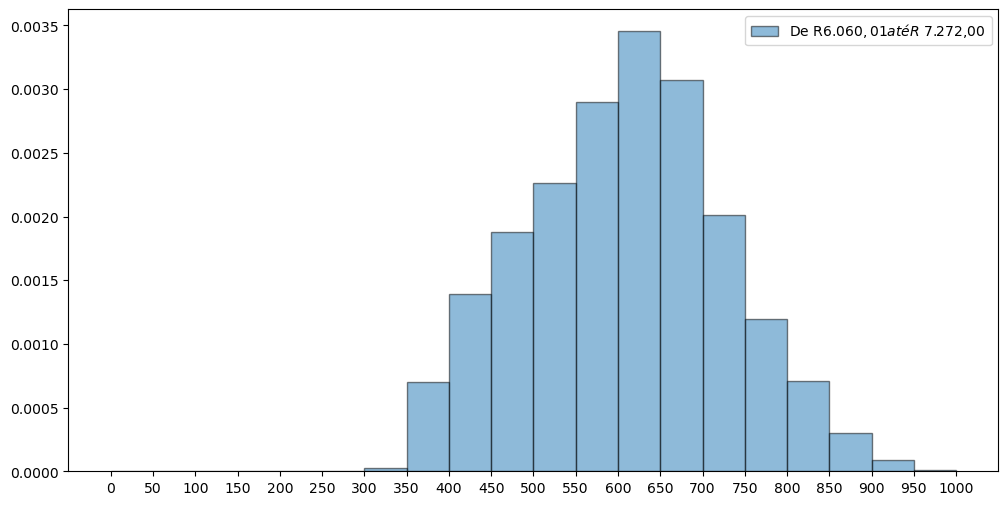

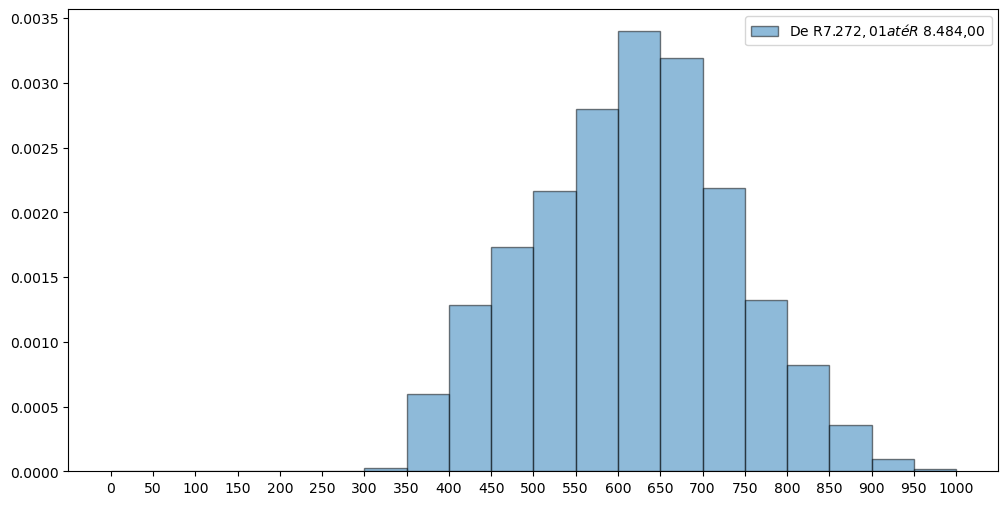

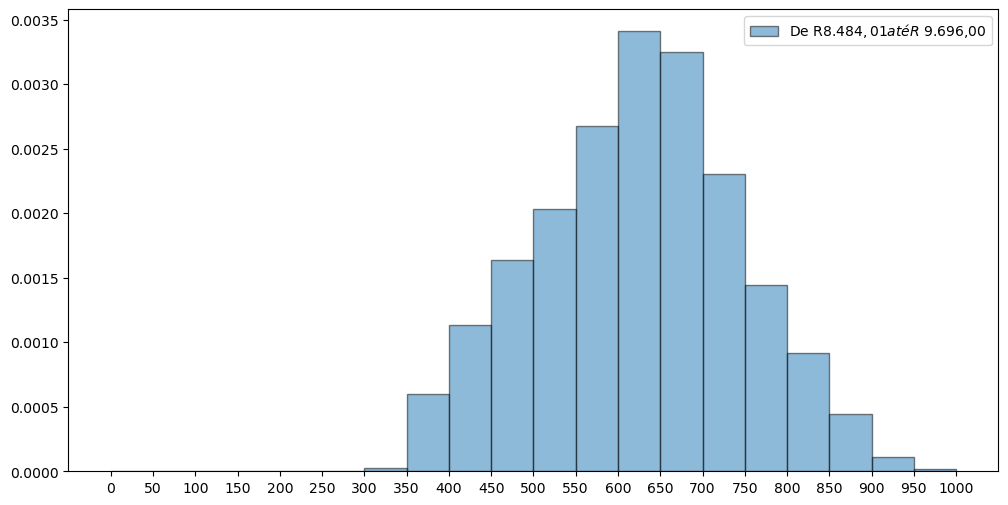

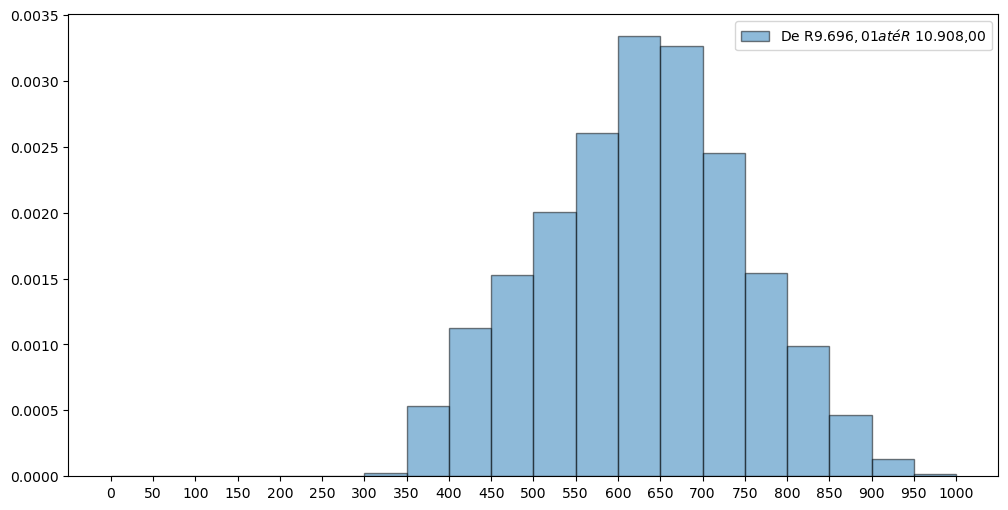

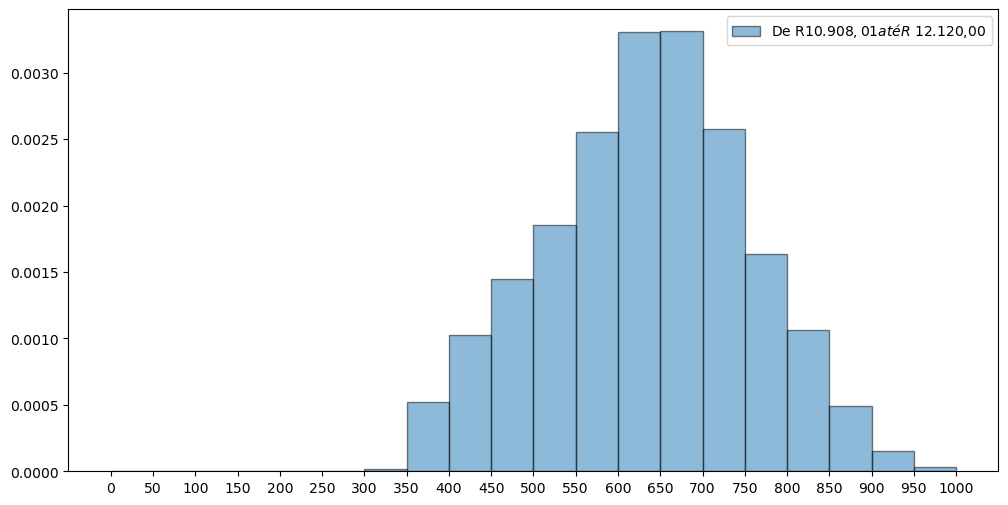

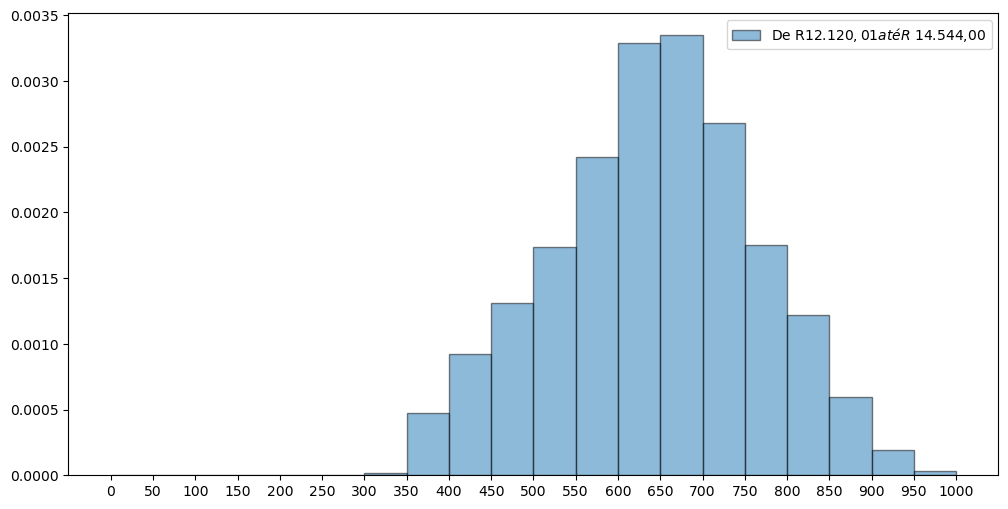

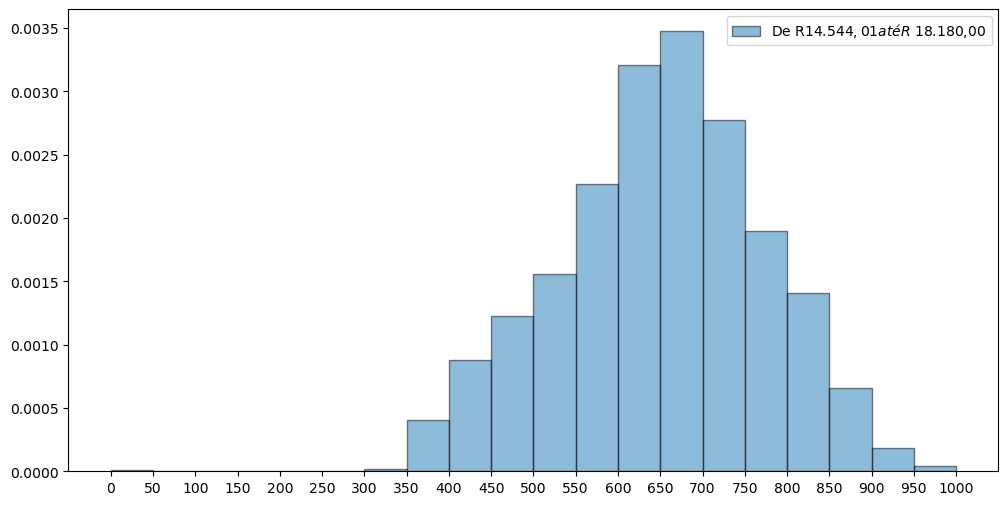

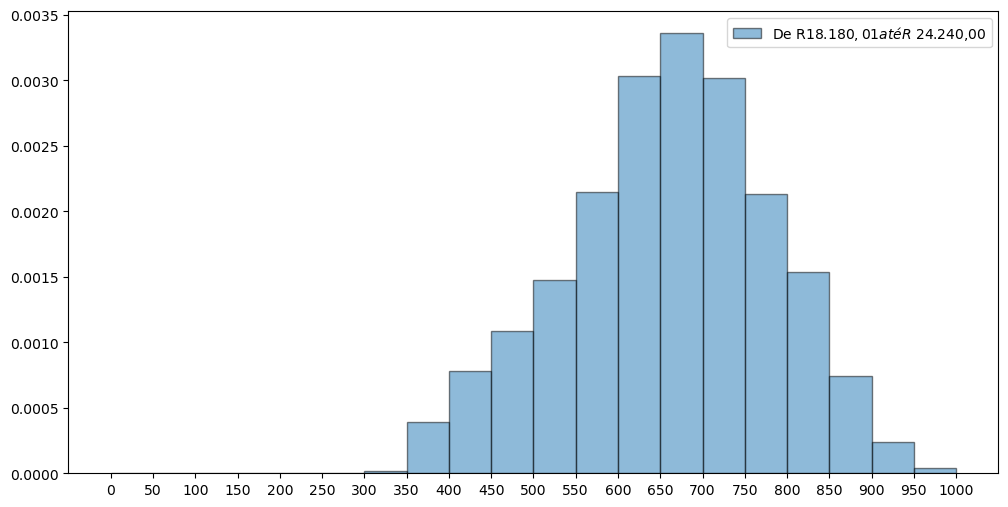

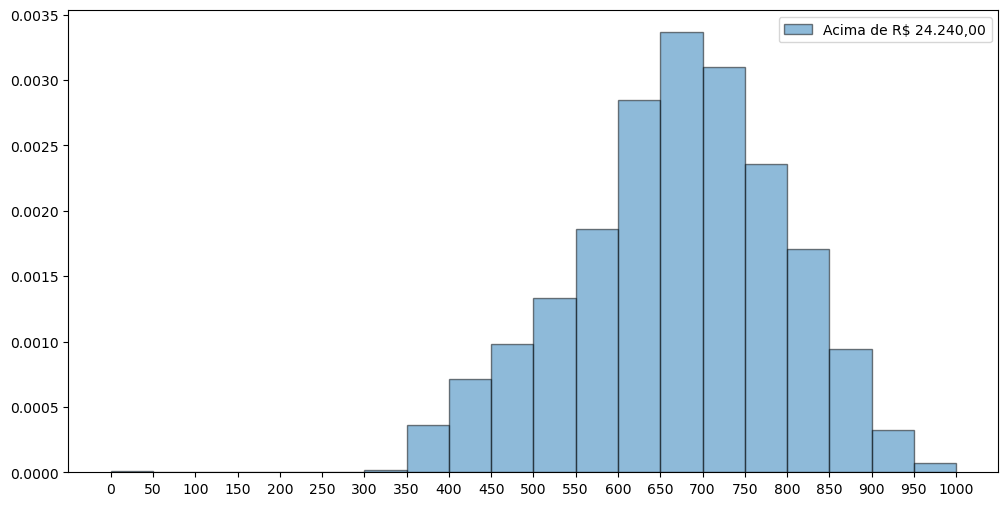

In [33]:
amp = np.linspace(0, 1000, 21)
for category in renda.categories:
    notas = dados.loc[dados.Q006 == category, 'NU_NOTA_MT']
    plt.figure(figsize=(12, 6))
    plt.hist(notas, bins=amp, alpha=0.5, label=category, density=True, edgecolor='black')
    plt.legend()
    plt.xticks(amp)
    plt.show()

In [34]:
dados.groupby('Q006').describe()['NU_NOTA_MT'].T.apply(lambda x: x.round(2))

Q006,Nenhuma Renda,"Até R$ 1.212,00","De R$ 1.212,01 até R$ 1.818,00","De R$ 1.818,01 até R$ 2.424,00","De R$ 2.424,01 até R$ 3.030,00","De R$ 3.030,01 até R$ 3.636,00","De R$ 3.636,01 até R$ 4.848,00","De R$ 4.848,01 até R$ 6.060,00","De R$ 6.060,01 até R$ 7.272,00","De R$ 7.272,01 até R$ 8.484,00","De R$ 8.484,01 até R$ 9.696,00","De R$ 9.696,01 até R$ 10.908,00","De R$ 10.908,01 até R$ 12.120,00","De R$ 12.120,01 até R$ 14.544,00","De R$ 14.544,01 até R$ 18.180,00","De R$ 18.180,01 até R$ 24.240,00","Acima de R$ 24.240,00"
count,119268.00,630492.00,369704.00,276804.00,194527.0,115203.00,145812.00,145866.00,62344.00,44115.00,31448.00,41407.00,39300.00,28365.00,31826.00,29282.00,39060.00
mean,472.89,492.06,520.95,537.09,553.2,569.26,579.26,593.96,608.17,616.69,623.73,628.40,634.18,642.84,650.65,659.34,670.56
std,86.41,92.54,100.00,103.93,107.8,110.29,112.53,114.82,117.70,118.21,119.71,119.98,120.60,121.12,121.22,121.73,124.05
min,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,407.20,419.70,441.90,454.80,468.5,484.60,493.68,508.62,523.10,533.25,539.60,545.10,552.70,563.00,572.82,581.80,593.60
50%,455.40,476.40,510.80,530.70,550.7,569.40,581.00,597.40,612.60,621.10,628.20,633.50,639.25,647.30,656.40,665.50,677.60
75%,523.20,552.60,590.90,610.10,628.4,645.70,656.60,671.80,687.40,696.60,704.30,709.90,715.90,725.10,732.80,743.70,757.50
max,951.90,977.00,983.20,985.70,975.0,985.70,985.70,985.70,981.30,977.00,983.90,979.70,983.90,985.70,985.70,985.70,983.90
